In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [40]:
df=pd.read_csv("time_series_ass3.unknown")

In [41]:
df.head()

,Unnamed: 0,From,To (Interval: 15M),PM10 (µg/m3),PM2.5 (µg/m3),NO (µg/m3)
0,0,2023-02-01 00:00:00,2023-02-01 00:15:00,95.0,35.0,NaN
1,1,2023-02-01 00:15:00,2023-02-01 00:30:00,95.0,35.0,NaN
2,2,2023-02-01 00:30:00,2023-02-01 00:45:00,95.0,35.0,NaN
3,3,2023-02-01 00:45:00,2023-02-01 01:00:00,122.0,34.0,NaN
4,4,2023-02-01 01:00:00,2023-02-01 01:15:00,122.0,34.0,NaN


In [42]:
df.describe()

,Unnamed: 0,PM10 (µg/m3),PM2.5 (µg/m3),NO (µg/m3)
count,8640.000000,6959.000000,8414.000000,7271.000000
mean,4319.500000,181.408679,75.690397,14.649636
std,2494.297496,136.016142,55.245265,19.221385
min,0.000000,12.000000,3.000000,0.100000
25%,2159.750000,84.000000,36.000000,3.900000
50%,4319.500000,145.000000,61.000000,6.100000
75%,6479.250000,238.000000,101.000000,16.500000
max,8639.000000,847.000000,474.000000,157.500000


In [43]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          8640 non-null   int64  
 1   From                8640 non-null   object 
 2   To (Interval: 15M)  8640 non-null   object 
 3   PM10 (µg/m3)        6959 non-null   float64
 4   PM2.5 (µg/m3)       8414 non-null   float64
 5   NO (µg/m3)          7271 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 405.1+ KB


In [44]:
df.isnull().sum()

Unnamed: 0               0
From                     0
To (Interval: 15M)       0
PM10 (µg/m3)          1681
PM2.5 (µg/m3)          226
NO (µg/m3)            1369
dtype: int64

In [46]:
df.columns

Index(['Unnamed: 0', 'From', 'To (Interval: 15M)', 'PM10 (µg/m3)',
       'PM2.5 (µg/m3)', 'NO (µg/m3)'],
      dtype='object')

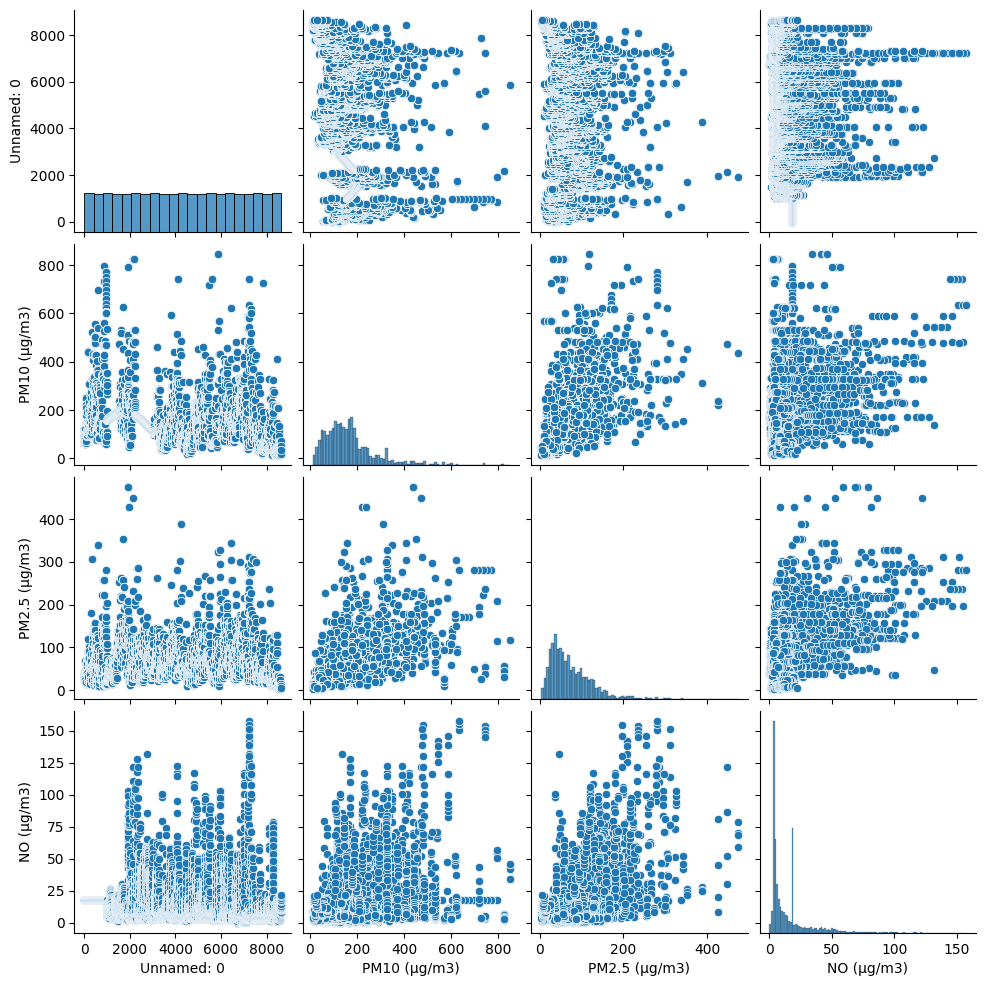

In [68]:
sns.pairplot(data=df)
data=df

In [67]:
data=data.drop(columns='Unnamed: 0')

KeyError: ignored

<Axes: >

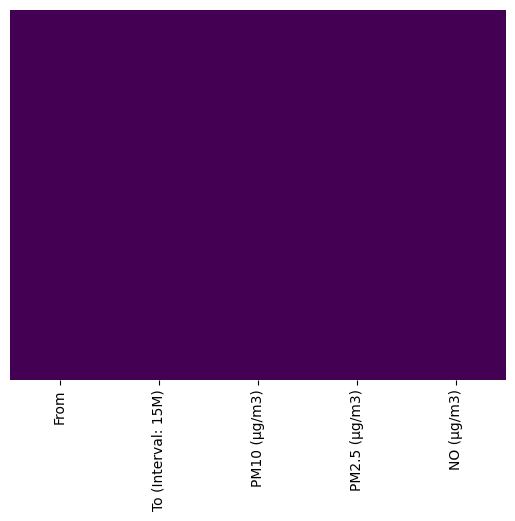

In [66]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

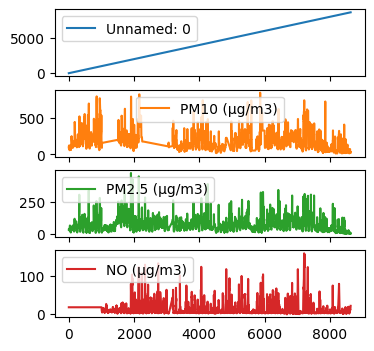

In [69]:
data.plot(subplots=True, figsize=(4, 4))

In [51]:
def remove_outliers(data, contamination=0.05):
    iso_forest = IsolationForest(contamination=contamination)
    outliers = iso_forest.fit_predict(data)
    return data[outliers != -1]

In [63]:
pollution_cols = ['PM10 (µg/m3)', 'PM2.5 (µg/m3)', 'NO (µg/m3)']
df[pollution_cols] = remove_outliers(df[col])

NameError: ignored

In [54]:
df[pollution_cols] = df[pollution_cols].interpolate(method='linear', limit_direction='both')


In [55]:
for col in pollution_cols:
    missing_indices = df[df[col].isnull()].index
    for idx in missing_indices:
        # Get the available data for the current feature
        available_data = df.loc[df[col].notnull(), col]

In [56]:
available_data = df.loc[df[col].notnull(), col]


In [57]:
model = ARIMA(available_data, order=(1, 0, 0))
model_fit = model.fit()
prediction = model_fit.predict(start=len(available_data), end=len(available_data))


In [58]:
print(df.describe())

        Unnamed: 0  PM10 (µg/m3)  PM2.5 (µg/m3)   NO (µg/m3)
count  8640.000000   8640.000000    8640.000000  8640.000000
mean   4319.500000    177.463079      75.557350    14.940208
std    2494.297496    124.773568      54.826850    17.862679
min       0.000000     12.000000       3.000000     0.100000
25%    2159.750000     97.000000      36.821429     4.000000
50%    4319.500000    151.900794      61.000000     7.500000
75%    6479.250000    215.000000     101.000000    18.100000
max    8639.000000    847.000000     474.000000   157.500000


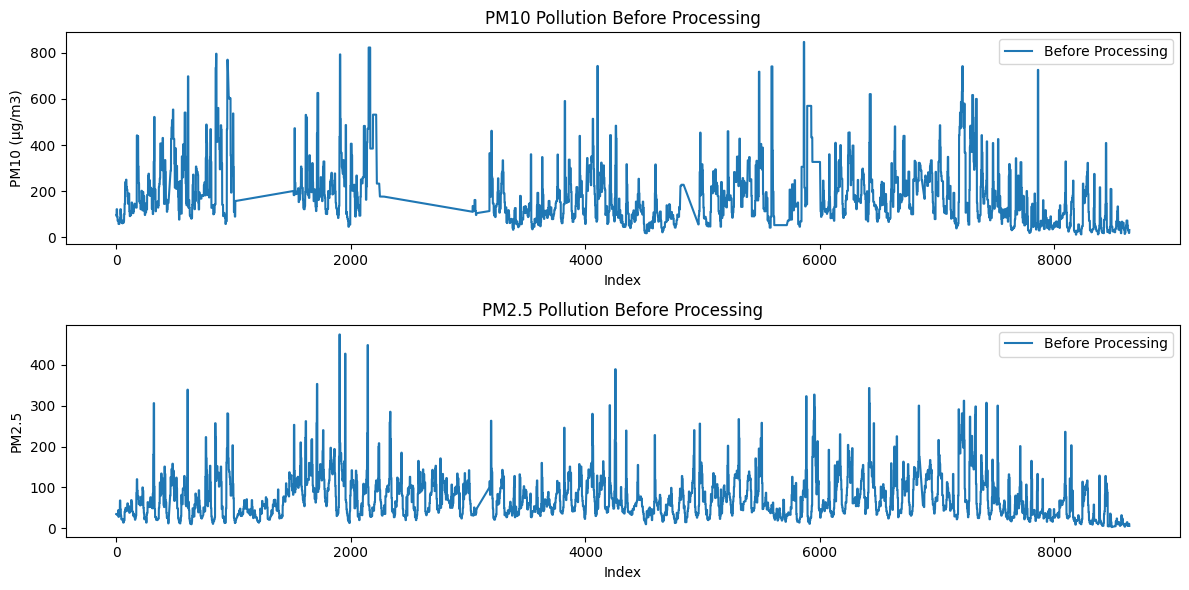

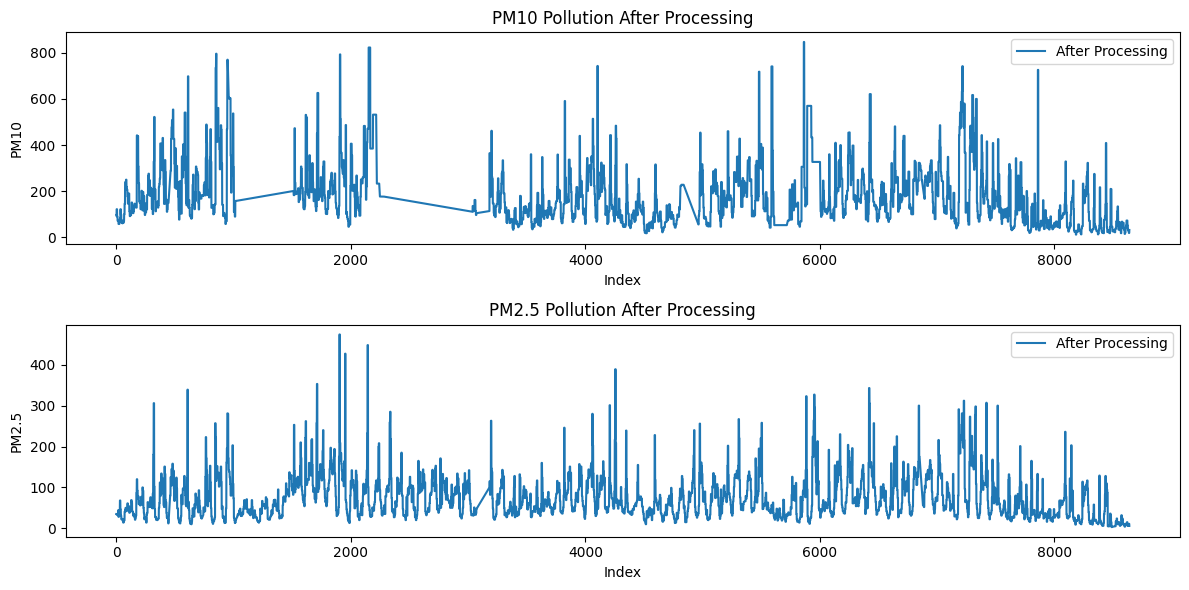

In [59]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(df.index, df['PM10 (µg/m3)'], label='Before Processing')
plt.xlabel('Index')
plt.ylabel('PM10 (µg/m3)')
plt.title('PM10 Pollution Before Processing')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df.index, df['PM2.5 (µg/m3)'], label='Before Processing')
plt.xlabel('Index')
plt.ylabel('PM2.5')
plt.title('PM2.5 Pollution Before Processing')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(df.index, df['PM10 (µg/m3)'], label='After Processing')
plt.xlabel('Index')
plt.ylabel('PM10')
plt.title('PM10 Pollution After Processing')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df.index, df['PM2.5 (µg/m3)'], label='After Processing')
plt.xlabel('Index')
plt.ylabel('PM2.5')
plt.title('PM2.5 Pollution After Processing')
plt.legend()

plt.tight_layout()
plt.show()
